## Task 3: Compare the original altitudes from the DWD station file to the heights derived from the DTM. Where and why are the strongest deviations?

## Importing necessary libaries and applying settings

In [1]:
import numpy as np # numpy arrays and functions for example replacing bad values with true NotaNumber
import matplotlib.pyplot as plt
%matplotlib inline 
# making plots available in jupyter output line
import pandas as pd # for pandas dataframe to read csv
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # linear regression

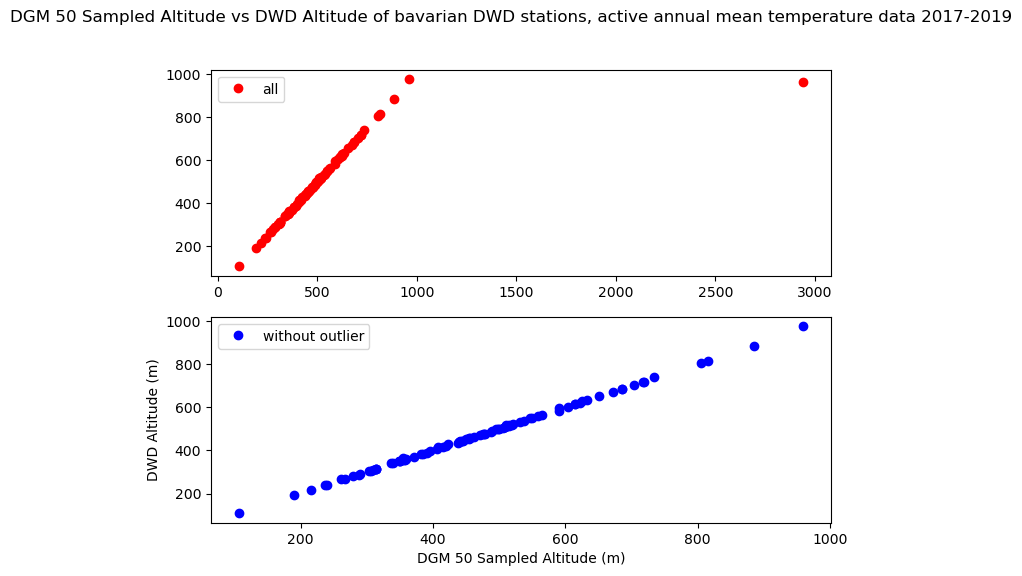

In [2]:
    df = pd.read_csv("df_all_dgm50.csv") # reading csv into dataframe
    df.set_index("station_id", inplace = True) # setting station_id column as index and replacing the standard numeration
    df.rename(columns = {"1": "dgm50_altitude"}, inplace=True)
    df.to_csv("df_all_dgm50.csv")
    df_woo = df[df.index != 5792]
    df_woo.to_csv("df_all_woo_dgm50.csv")
    fig, (ax1, ax2) = plt.subplots(2, dpi=100, figsize=(8,6))
    ax1.plot(df["dgm50_altitude"], df["altitude"], 'ro', label="all")
    ax2.plot(df_woo["dgm50_altitude"], df_woo["altitude"], 'bo', label="without outlier")
    fig.suptitle("DGM 50 Sampled Altitude vs DWD Altitude of bavarian DWD stations, active annual mean temperature data 2017-2019")
    plt.xlabel("DGM 50 Sampled Altitude (m)")
    plt.ylabel("DWD Altitude (m)")
    ax1.legend()
    ax2.legend()
    fig.savefig("dgm_50_sampled_altitude_vs_dwd_altitude_plot.png")
    plt.show()

In [3]:
# write something
df.describe()

,altitude,latitude,longitude,amt_2017,amt_2018,amt_2019,dgm50_altitude
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,478.577778,48.915210,11.412206,8.870667,9.945333,9.549778,499.266555
std,165.510241,0.862785,1.063022,1.532960,1.573836,1.532055,303.706027
min,108.000000,47.398400,8.993000,-3.860000,-3.000000,-3.200000,107.430000
25%,359.000000,48.223200,10.520000,8.592500,9.612500,9.207500,356.642494
50%,459.500000,48.842500,11.408850,9.080000,10.160000,9.705000,459.059998
75%,557.750000,49.660425,12.246150,9.475000,10.602500,10.147500,555.895004
max,977.000000,50.453800,13.629000,11.060000,12.200000,11.660000,2940.110107


In [4]:
print("With outliers:\n--------------")
max_id = (df["altitude"]-df["dgm50_altitude"]).abs().idxmax()
max_d = (df["altitude"]-df["dgm50_altitude"]).abs().max()
max_name = df.loc[max_id,"name"]
max_alt = df.loc[max_id, "altitude"]
max_dgm50_alt = df.loc[max_id, "dgm50_altitude"]
min_id = (df["altitude"]-df["dgm50_altitude"]).abs().idxmin()
min_d = (df["altitude"]-df["dgm50_altitude"]).abs().min()
min_name = df.loc[min_id, "name"]
min_alt = df.loc[min_id, "altitude"]
min_dgm50_alt = df.loc[max_id, "dgm50_altitude"]
print("Descreptancy between DWD altitude and sampled DGM 50 altitude is maximal at station:\n",max_name,"(",max_id,"), Difference:",max_d,"m, DWD Altitude:",max_alt,"m, DGM 50 Altitude:",max_dgm50_alt,"m\n")
print("Descreptancy between DWD altitude and sampled DGM 50 altitude is minimal at station:\n",min_name,"(",min_id,"), Difference:",min_d,"m, DWD Altitude:",min_alt,"m, DGM 50 Altitude:",min_dgm50_alt,"m")

With outliers:
--------------
Descreptancy between DWD altitude and sampled DGM 50 altitude is maximal at station:
 Zugspitze ( 5792 ), Difference: 1975.11010742188 m, DWD Altitude: 965 m, DGM 50 Altitude: 2940.11010742188 m

Descreptancy between DWD altitude and sampled DGM 50 altitude is minimal at station:
 Lohr/Main-Halsbach ( 6336 ), Difference: 0.019989013671988687 m, DWD Altitude: 288 m, DGM 50 Altitude: 2940.11010742188 m


In [5]:
df_woo.describe()

,altitude,latitude,longitude,amt_2017,amt_2018,amt_2019,dgm50_altitude
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,473.112360,48.931999,11.417008,9.013708,10.090787,9.693034,471.841347
std,158.069636,0.852760,1.068063,0.717129,0.761166,0.711248,157.554692
min,108.000000,47.398400,8.993000,7.190000,8.200000,7.660000,107.430000
25%,358.000000,48.271800,10.506700,8.600000,9.650000,9.230000,356.369995
50%,457.000000,48.854800,11.428900,9.080000,10.160000,9.720000,456.279999
75%,551.000000,49.664000,12.257600,9.480000,10.610000,10.150000,549.909973
max,977.000000,50.453800,13.629000,11.060000,12.200000,11.660000,958.869995


In [6]:
print("Without outliers:\n-----------------")
max_id = (df_woo["altitude"]-df_woo["dgm50_altitude"]).abs().idxmax()
max_d = (df_woo["altitude"]-df_woo["dgm50_altitude"]).abs().max()
max_name = df_woo.loc[max_id,"name"]
max_alt = df_woo.loc[max_id, "altitude"]
max_dgm50_alt = df_woo.loc[max_id, "dgm50_altitude"]
min_id = (df_woo["altitude"]-df_woo["dgm50_altitude"]).abs().idxmin()
min_d = (df_woo["altitude"]-df_woo["dgm50_altitude"]).abs().min()
min_name = df_woo.loc[min_id, "name"]
min_alt = df_woo.loc[min_id, "altitude"]
min_dgm50_alt = df_woo.loc[max_id, "dgm50_altitude"]
print("Descreptancy between DWD altitude and sampled DGM 50 altitude is maximal at station:\n",max_name,"(",max_id,"), Difference:",max_d,"m, DWD Altitude:",max_alt,"m, DGM 50 Altitude:",max_dgm50_alt,"m\n")
print("Descreptancy between DWD altitude and sampled DGM 50 altitude is minimal at station:\n",min_name,"(",min_id,"), Difference:",min_d,"m, DWD Altitude:",min_alt,"m, DGM 50 Altitude:",min_dgm50_alt,"m")

Without outliers:
-----------------
Descreptancy between DWD altitude and sampled DGM 50 altitude is maximal at station:
 Hohenpeißenberg ( 2290 ), Difference: 18.130004882812045 m, DWD Altitude: 977 m, DGM 50 Altitude: 958.869995117188 m

Descreptancy between DWD altitude and sampled DGM 50 altitude is minimal at station:
 Lohr/Main-Halsbach ( 6336 ), Difference: 0.019989013671988687 m, DWD Altitude: 288 m, DGM 50 Altitude: 958.869995117188 m


In [7]:
a = df[df.index == 5792]
print("The outlier has the biggest discrepancy between the altitude values. This can only be an error in the dataset of the Deutscher Wetterdienst as an other source shows the altitude of 2964 m") # https://www.bergfex.com/bayern/wetter/stationen/zugspitze-2/
print("Station ID: ",a.index.values[0],", Name: ",a["name"].values[0],", Altitude: ",a["altitude"].values[0],"m , DGM50 Altitude: ",a["dgm50_altitude"].values[0],"m")

The outlier has the biggest discrepancy between the altitude values. This can only be an error in the dataset of the Deutscher Wetterdienst as an other source shows the altitude of 2964 m
Station ID:  5792 , Name:  Zugspitze , Altitude:  965 m , DGM50 Altitude:  2940.11010742188 m


Seeing only minimal deviations between the values when excluding the outlier:


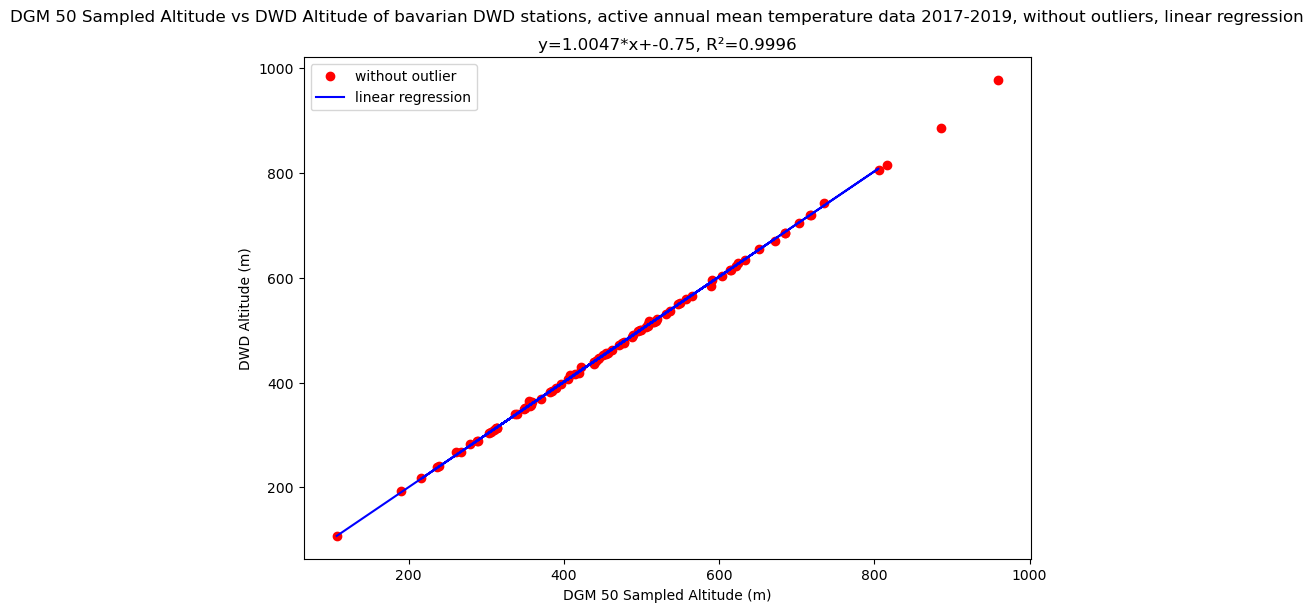

The high  0.9996 value means the regression model describes the data points well and the values only have minimal deviation when regarding them without the outlier Zugspitze.


In [8]:
print("Seeing only minimal deviations between the values when excluding the outlier:")
X = np.array(df_woo["dgm50_altitude"]).reshape(-1, 1) # populating an numpy array in correct shape with dataframe values, without the outlier
y = np.array(df_woo["altitude"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # split values into training values and test values to evaluate the fit of regression
regr = LinearRegression() # initiating linear regression model
regr.fit(X_train, y_train) # training / fitting model
score = regr.score(X_test, y_test) # calculate score / how well the model describes datapoints
b = round((regr.intercept_[0]),4)
m = round((regr.coef_[0][0]),4)
r = round(score,4)
y_pred = regr.predict(X_test) # linear regression function

# plotting data and regression function
fig, ax1 = plt.subplots(dpi=100, figsize=(8,6))
fig.tight_layout(h_pad=2)
ax1.plot(df_woo["dgm50_altitude"], df_woo["altitude"], 'ro', label="without outlier") # data
ax1.plot(X_test, y_pred, 'b', label="linear regression") # linear regression function
fig.suptitle("DGM 50 Sampled Altitude vs DWD Altitude of bavarian DWD stations, active annual mean temperature data 2017-2019, without outliers, linear regression")
plt.subplots_adjust(top=0.9)
plt.xlabel("DGM 50 Sampled Altitude (m)")
plt.ylabel("DWD Altitude (m)")
ax1.set_title("y="+str(m)+"*x+"+str(b)+", R²="+str(r))
ax1.legend()
fig.savefig("dgm_50_sampled_altitude_vs_dwd_altitude_lr_woo.png")
plt.show()
print("The high ",r,"value means the regression model describes the data points well and the values only have minimal deviation when regarding them without the outlier Zugspitze.")

But when including the wrong values the function doesnt fit as well:


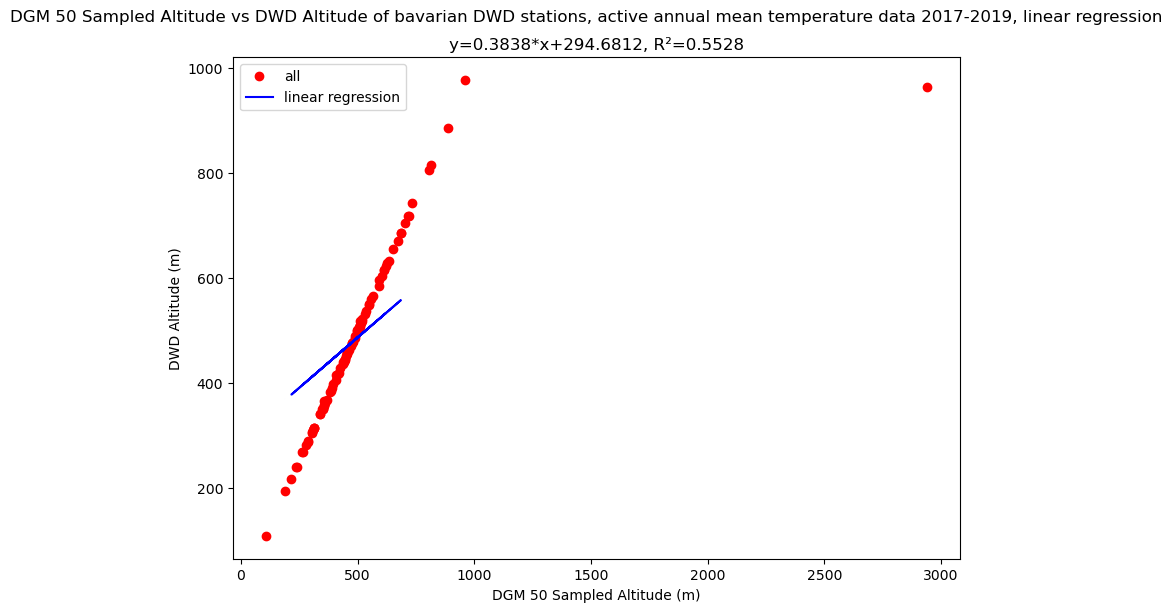

In [9]:
print("But when including the wrong values the function doesnt fit as well:")
X = np.array(df["dgm50_altitude"]).reshape(-1, 1) # populating an numpy array in correct shape with dataframe values, with the outlier
y = np.array(df["altitude"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)
b = round((regr.intercept_[0]),4)
m = round((regr.coef_[0][0]),4)
r = round(score,4)
y_pred = regr.predict(X_test)

fig, ax1 = plt.subplots(dpi=100, figsize=(8,6))
fig.tight_layout(h_pad=2)
ax1.plot(df["dgm50_altitude"], df["altitude"], 'ro', label="all")
ax1.plot(X_test, y_pred, 'b', label="linear regression")
fig.suptitle("DGM 50 Sampled Altitude vs DWD Altitude of bavarian DWD stations, active annual mean temperature data 2017-2019, linear regression")
plt.subplots_adjust(top=0.9)
plt.xlabel("DGM 50 Sampled Altitude (m)")
plt.ylabel("DWD Altitude (m)")
ax1.set_title("y="+str(m)+"*x+"+str(b)+", R²="+str(r))
ax1.legend()
#plt.arrow(x=2900, y=960, dx=0, dy=1900)#, width, length_includes_head, head_width, head_length)
#plt.annotate("", xy=(0.9, 0.9), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
fig.savefig("dgm_50_sampled_altitude_vs_dwd_altitude_lr.png")
plt.show()

In [10]:
df

,altitude,latitude,longitude,name,amt_2017,amt_2018,amt_2019,dgm50_altitude
station_id,,,,,,,,
73,340,48.6159,13.0506,Aldersbach-Kriestorf,9.38,10.73,10.16,339.470001
142,511,48.4060,11.3117,Altomünster-Maisbrunn,9.19,10.16,9.81,508.619995
151,382,49.4691,11.8546,Amberg-Unterammersricht,9.30,10.39,10.09,381.589996
154,516,48.0197,12.2925,Amerang-Pfaffing,8.91,9.98,9.57,515.580017
191,217,49.9694,9.9114,Arnstein-Müdesheim,9.61,10.58,10.19,216.000000
...,...,...,...,...,...,...,...,...
7412,340,50.0083,9.4238,Neuhütten/Spessart,8.98,10.04,9.64,336.529999
7424,457,47.7724,12.9073,Piding,8.94,9.91,9.69,456.279999
7431,604,48.0130,11.5524,Oberhaching-Laufzorn,8.72,9.60,9.06,603.799988
